In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

# JTC (JAPAN TOURING CAR) 1985-1993
## O Objetivo é um realizar um projeto ETL, mineração de dados com BeautifulSoup, de análise de dados (Pandas,NumPy) e visualização de dados (matplotlib,seaborn). 

## Etapa 1 : Minerar dados através do site touringcarracing.net e juntar os dados de todas as tabelas de todas as corridas, desde o início da categoria em 1985 até a extinção dela em 1993, em uma única grande tabela em .csv (de preferência). 

## Etapa 2: Com a Extração concluída, os dados RAW estão preparados para análise de dados, realizar drops em algumas colunas, criar colunas com informações já coletadas através do HTML com o Beautiful Soup (Ex: coletar a info do ano e Circuito no HTML e criar uma coluna para uma dessas infos), mudar os index da tabela, separar colunas com muitas informações (fazer split em colunas como Piloto/Nacionalidade), tratar NULL,NaN, substituir valores, tratar tipos de dados (datatime principalmente), preparar os dados numéricos de tal forma a realizar operações matemáticas/estatísticas com os mesmos.

## Etapa 3: Com a etapa de Transformação de dados concluída e o Loading de dados feito no arquivo .csv gerado, realizar a Visualização de Dados através do Matplotlib/Seaborn. Responder algumas perguntas: Qual montadora conquistou mais pódios? Será que quem faz Poli position sempre ganha? Cacular o porcentual Vitórias por Pole. Quantas vezes o lendário Team Impul não terminou uma corrida (DNF- Did Not Finish) ? Qual porcentual de carros com  motores que não são 4 cilindros (L4), entre 1985 a 1989? Qual a volta mais rápida, na qualificação, em todo tempo que a categoria existiu, em Suzuka e qual foi o piloto e modelo do carro?

### And so on...
### Objetivos secundários incluem algumas análises estatísticas, integração com BDs, análise em outras ferramentas de análise, etc.
### Realizar análise em outras categorias, ETCC, WTCC, WTRC, DTM

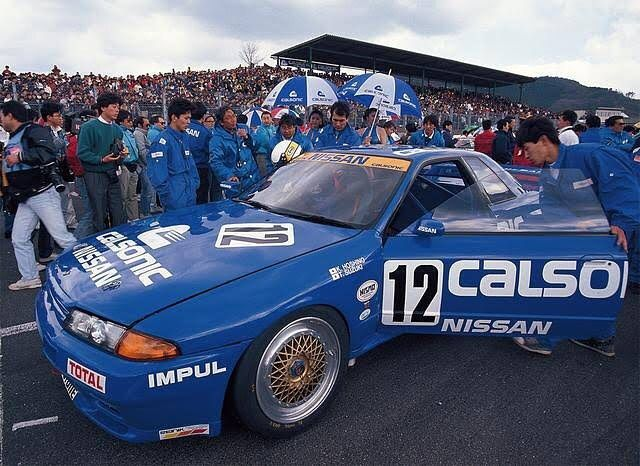

In [ ]:
headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
page= requests.get("http://touringcarracing.net/Races/1985%20Sugo.html", headers = headers)
print(page.content)
soup= BeautifulSoup(page.content,'html.parser')


In [ ]:
print(soup)

In [ ]:
import csv

In [ ]:
attrs_circuit={'class','circuit'}
circuit = soup.find('div',attrs_circuit).text
print(circuit)

In [ ]:
attrs_date={'class','element'}
date = soup.find('span',attrs=attrs_date).next_sibling.strip()

print(date)

In [ ]:
#atributos = {'class' : 'datasheet'}
#respostas = soup.find_all("p")

#tabela = soup.find_all("p",attrs=atributos)

attrs_table = {'cellspacing' : '0'}
table= soup.find("table",attrs=attrs_table)
table_str = str(table)
df = pd.read_html(table_str)
display(df)


In [ ]:
print( type(df) )

In [ ]:
df[0].head(10)

In [ ]:
df[0].to_csv("JTC.csv")